# <font color = 'purple'> AUC - ROC Curve in Python </font>

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate 2 class dataset
X, y = make_classification(n_samples = 1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 27)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model1 = LogisticRegression()

model2 = KNeighborsClassifier(n_neighbors = 4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

print(pred_prob1, '\n\n===================\n\n',pred_prob2)

[[4.24163731e-03 9.95758363e-01]
 [9.89644051e-01 1.03559491e-02]
 [5.01252208e-05 9.99949875e-01]
 [8.58698467e-01 1.41301533e-01]
 [3.72425389e-01 6.27574611e-01]
 [9.74275380e-01 2.57246197e-02]
 [9.99677193e-01 3.22806515e-04]
 [6.70338963e-01 3.29661037e-01]
 [1.27738231e-01 8.72261769e-01]
 [3.41530252e-02 9.65846975e-01]
 [1.21992495e-01 8.78007505e-01]
 [9.97923279e-01 2.07672146e-03]
 [4.76731051e-01 5.23268949e-01]
 [9.94895776e-01 5.10422436e-03]
 [9.67578587e-01 3.24214127e-02]
 [9.86871191e-01 1.31288092e-02]
 [9.48974008e-01 5.10259918e-02]
 [2.89861407e-03 9.97101386e-01]
 [9.99727345e-01 2.72654631e-04]
 [9.52366420e-01 4.76335797e-02]
 [9.83778801e-01 1.62211990e-02]
 [9.90141893e-01 9.85810714e-03]
 [9.84360706e-01 1.56392940e-02]
 [1.50042831e-02 9.84995717e-01]
 [9.66576810e-01 3.34231896e-02]
 [9.87791455e-03 9.90122085e-01]
 [2.71868830e-01 7.28131170e-01]
 [9.75439266e-01 2.45607343e-02]
 [9.99862728e-01 1.37271509e-04]
 [7.86690022e-01 2.13309978e-01]
 [8.317601

<div class="alert alert-warning"> Note that with Roc and Auc curve method, we use <b>predict_proba()</b> instea of <b>predict()</b>. Read more about these here: <a href="https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376">LINK</a></div>

In [5]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs= [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

print(p_fpr, p_tpr, _)

[0. 1.] [0. 1.] [1 0]


In [6]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


<font color="red"> This shows us that the algorithm Logistic Regression is better than K Nearest Neighbours for this problem with a higher auc score</font>

## Plotting the ROC curves

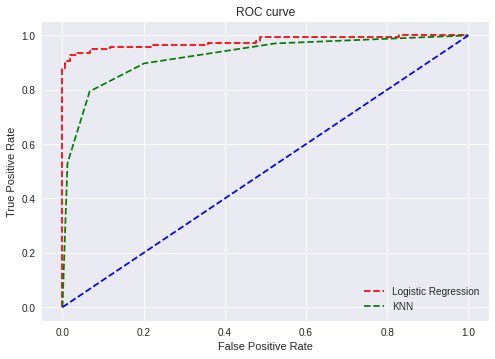

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#plot roc curves
plt.plot(fpr1, tpr1, 'r--', label="Logistic Regression")
plt.plot(fpr2, tpr2, 'g--', label="KNN")
plt.plot(p_fpr, p_tpr, 'b--')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi = 300)
plt.show()

<div class='alert alert-info'>
    <p>The AUC-ROC curve is only for Binary Classification problem, but can be extended well to Multiclass classification using <b>One V/S All technique</b></p>
</div>

## Multiclass Classification

In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [16]:
# generate 3 class dataset
X,y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)


In [19]:
?make_classification 

RUN ABOVE CELL FOR READING DOCS

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [21]:
# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)


In [22]:
# roc curve for classes
fpr = {}
tpr={}
thresh={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)


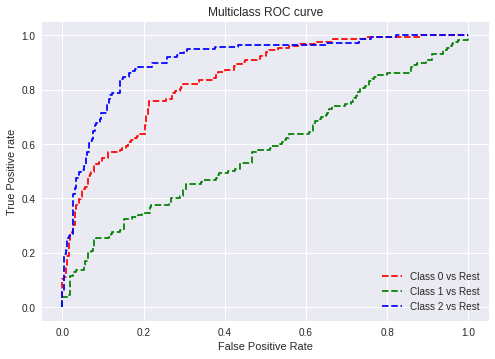

In [23]:
# plotting

plt.plot(fpr[0], tpr[0], 'r--', label="Class 0 vs Rest")
plt.plot(fpr[1], tpr[1], 'g--', label="Class 1 vs Rest")
plt.plot(fpr[2], tpr[2], 'b--', label="Class 2 vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);